In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_excel('/content/ECOMM DATA.xlsx')

In [ ]:
data.head(100)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.00,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.10,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.10,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.10,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.00,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,31278,IN-2012-86698,2012-05-07,2012-05-07,Same Day,NC-18625,Noah Childs,Corporate,Newcastle,New South Wales,...,FUR-TA-10003627,Furniture,Tables,"Bevis Conference Table, with Bottom Storage",1847.520,2,0.00,738.9600,545.89,High
96,12035,ES-2013-2903666,2013-11-27,2013-11-29,First Class,NF-18385,Natalie Fritzler,Consumer,Graz,Styria,...,FUR-BO-10001133,Furniture,Bookcases,"Ikea Classic Bookcase, Mobile",2899.890,7,0.00,927.7800,541.59,High
97,29149,IN-2012-30446,2012-11-28,2012-12-02,Second Class,NZ-18565,Nick Zandusky,Home Office,Nowra,New South Wales,...,FUR-CH-10000027,Furniture,Chairs,"SAFCO Executive Leather Armchair, Black",2891.700,7,0.10,96.3900,541.57,Medium
98,15896,IT-2012-1779015,2012-09-29,2012-09-29,Same Day,PM-18940,Paul MacIntyre,Consumer,Boulogne-Billancourt,Ile-de-France,...,TEC-MA-10003515,Technology,Machines,"Panasonic Printer, Red",2016.846,9,0.15,-0.0540,540.77,Critical


In [ ]:
data.shape

(51290, 24)

In [ ]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [ ]:
data['Postal Code'].value_counts()

Postal Code
10035.0    263
10024.0    230
10009.0    229
94122.0    203
10011.0    193
          ... 
92399.0      1
21740.0      1
57401.0      1
29730.0      1
83501.0      1
Name: count, Length: 631, dtype: int64

In [ ]:
data['Postal Code'].fillna('C7', inplace=True)

In [ ]:
data.head(20)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,2013-06-28,2013-07-01,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,2011-11-07,2011-11-09,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,2012-04-14,2012-04-18,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


In [ ]:
print(data.describe())

            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date         Sales      Quantity  \
count                          51290  51290.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528    246.490581      3.476545   
min              2011-01-03 00:00:00      0.444000      1.000000   
25%              2012-06-23 00:00:00     30.758625      2.000000   
50%              2013-07-12 00:00:00     85.053000      3.000000   
75%              2014-05-26 00:00:00    251.053200      5.000000   
max              2015-01-07 00:00:00  22638.48

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     51290 non-null  object        
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
total_sales = data['Sales'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 12642501.909880001


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data.set_index('Order Date', inplace=True)
data.sort_index(inplace=True)

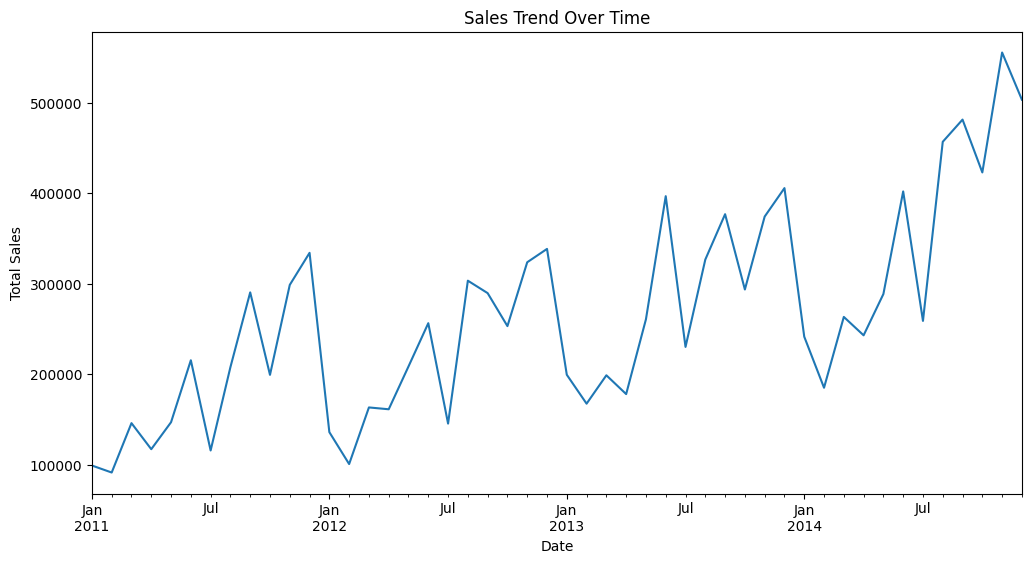

In [ ]:
sales_trend = data['Sales'].resample('M').sum()
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
current_index = data.indexcurrent_index = data.index


<ipython-input-24-6a78bb25853a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  current_index = data.indexcurrent_index = data.index


In [ ]:
print(f"Current index type: {type(current_index)}")
print(f"Current index name: {current_index.name}")

Current index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Current index name: Order Date


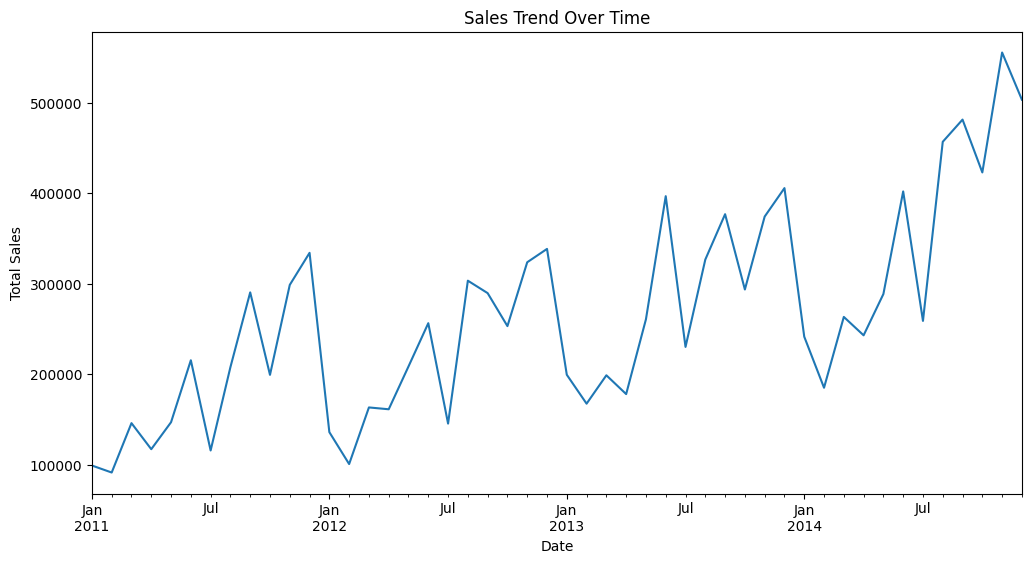

In [ ]:
if current_index.name == 'Order Date':
    # Plot sales trends over time
    sales_trend = data['Sales'].resample('M').sum()
    plt.figure(figsize=(12, 6))
    sales_trend.plot()
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()
else:
    print("The index is not set correctly. Please ensure 'Order Date' is set as the index.")